In [4]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import os

In [20]:
def print_one_masked_image(filename):
    image_path = "./data/test_images/" + filename
    file_without_extension = os.path.splitext(filename)[0]
    segmentation_path = "./data/results_segmentation/" + file_without_extension + ".npy"
    
    # Output data
    data = np.load(segmentation_path)
    # Original image
    img = cv2.imread(image_path,0)
    img = cv2.resize(img, (np.shape(data)[2], np.shape(data)[1]))

    # Threshold for name segmentation
    names = np.where(data[1]>0.05,255,0).astype(np.uint8)
    ret, mask_names = cv2.threshold(np.float32(names), 1, 255, cv2.THRESH_BINARY)
    res_names = cv2.bitwise_and(img,mask_names.astype(np.uint8))
    res_names = Image.fromarray(res_names)

    # Threshold for scene segmentation
    scene = np.where(data[2]>0.1,255,0).astype(np.uint8)
    ret, mask_scene = cv2.threshold(np.float32(scene), 1, 255, cv2.THRESH_BINARY)
    res_scene = cv2.bitwise_and(img,mask_scene.astype(np.uint8))
    res_scene = Image.fromarray(res_scene)

    # Threshold for description segmentation
    description = np.where(data[3]>0.2,255,0).astype(np.uint8)
    ret, mask_description = cv2.threshold(np.float32(description), 1, 255, cv2.THRESH_BINARY)
    res_description = cv2.bitwise_and(img,mask_description.astype(np.uint8))
    res_description = Image.fromarray(res_description)


    # Plotting results
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4,figsize=(20,20))
    ax1.imshow(img)
    ax1.set_title('Original Image')
    ax2.imshow(res_names)
    ax2.set_title('Names')
    ax3.imshow(res_scene)
    ax3.set_title('Scenes')
    ax4.imshow(res_description)
    ax4.set_title('Descriptions')

    # Saving the results
    res_names.save("./data/segmented_images/" + file_without_extension + "_names.png" )
    res_scene.save("./data/segmented_images/" + file_without_extension + "_scenes.png")
    res_description.save("./data/segmented_images/" + file_without_extension + "_descriptions.png")

In [21]:
def print_masked_images():
    # Going through all the test images
    for filename in os.listdir("./data/test_images"):
        if filename.endswith(".jpg"): 
            print_one_masked_image(filename)
            continue
        else:
            continue
    

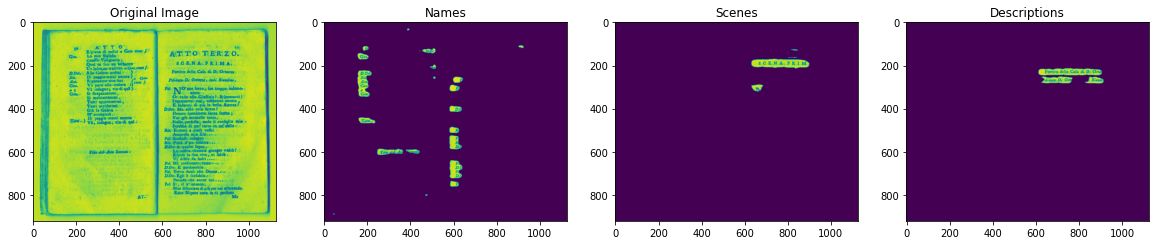

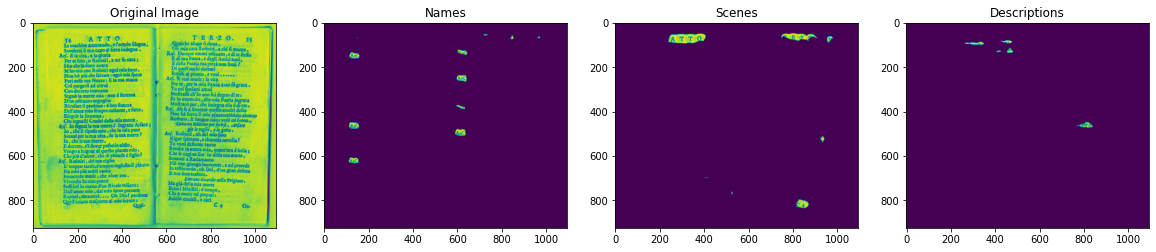

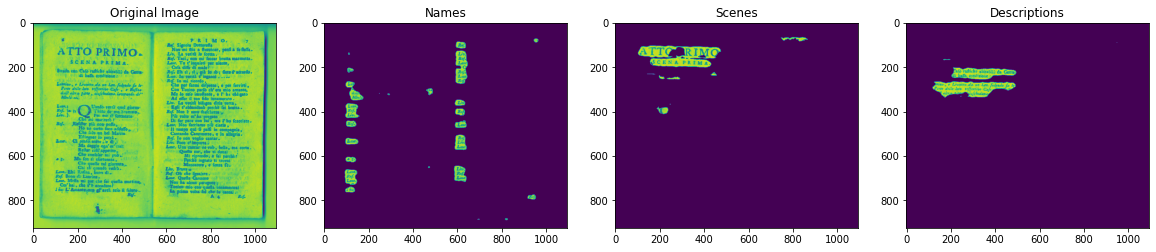

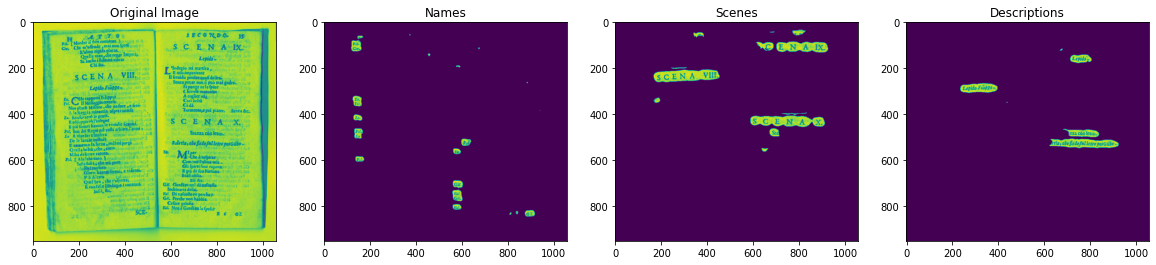

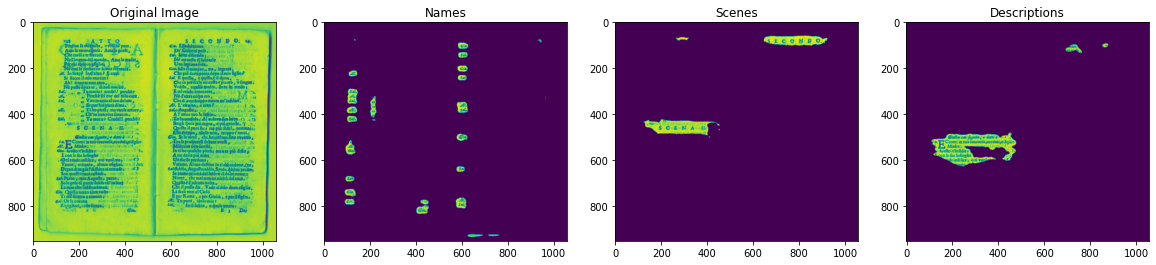

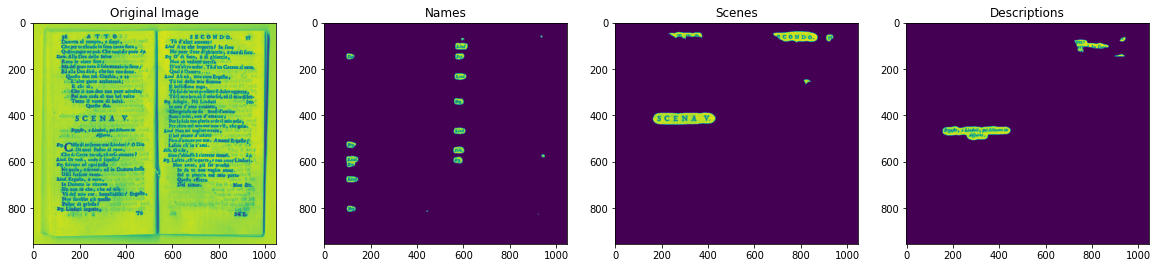

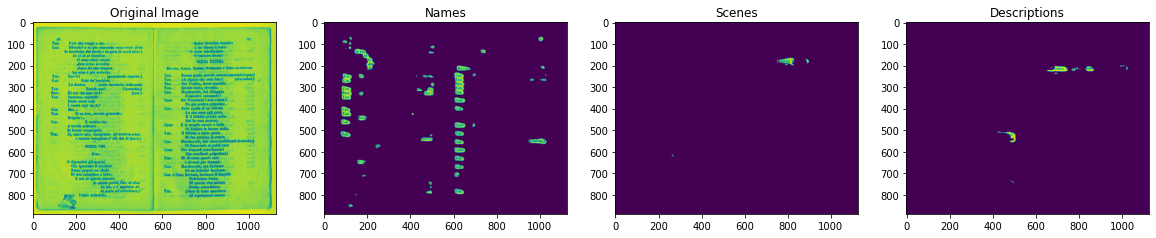

In [22]:
print_masked_images()